### HYPERPARAMETER OPTIMIZATION WITH GRIDSERCHCV

In [1]:
# import packages
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from skopt.searchcv import BayesSearchCV
from skopt.space import Integer, Real, Categorical 
from skopt.utils import use_named_args
from skopt import gp_minimize

import warnings

warnings.filterwarnings("ignore")

In [2]:
# load data 
data = pd.read_csv("data/mobile_price_data.csv")

In [3]:
#read data 
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#show shape
data.shape 

(2000, 21)

In [5]:
#show list of columns 
list(data.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [6]:
# show data properties
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# show data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# check if it has missing values 
data.isnull().sum() 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# split data into features and target 
X = data.drop("price_range", axis=1).values 
y = data.price_range.values

In [10]:
# standardize the feature variables 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#Create classifier 
rf_classifier = RandomForestClassifier(n_jobs=-1) 

# First Approach 

In [12]:
# define search space 
params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": (1, 9),
    "criterion": ["gini", "entropy"],
}


In [13]:
# define the search
search = BayesSearchCV(
    estimator=rf_classifier,
    search_spaces=params,
    n_jobs=1,
    cv=5,
    n_iter=30,
    scoring="accuracy",
    verbose=4,
    random_state=42
)

In [20]:
# perform the search
search.fit(X_scaled,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.873, total=   5.8s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.873, total=   1.5s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.882, total=   1.4s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.853, total=   1.5s
[CV] criterion=gini, max_depth=7, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=7, n_estimators=400, score=0.860, total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished


TypeError: object.__init__() takes exactly one argument (the instance to initialize)

In [15]:
# report the best result
#print(search.best_score_)
#print(search.best_params_)

# Second Approach

In [16]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Categorical([100, 200, 300, 400], name='n_estimators'))
search_space.append(Categorical(['gini', 'entropy'], name='criterion'))
search_space.append(Integer(1, 9, name='max_depth'))

In [17]:
# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # configure the model with specific hyperparameters
    clf = RandomForestClassifier(**params, n_jobs=-1)
    acc = cross_val_score(clf, X_scaled, y, scoring="accuracy").mean()
    return -acc

In [18]:
# perform optimization
result = gp_minimize(
    func=evaluate_model,
    dimensions=search_space,
    n_calls=30,
    random_state=42,
    verbose=True,
    n_jobs=1,
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 14.7886
Function value obtained: -0.8665
Current minimum: -0.8665
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.2940
Function value obtained: -0.7765
Current minimum: -0.8665
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.5199
Function value obtained: -0.7485
Current minimum: -0.8665
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 5.6712
Function value obtained: -0.8600
Current minimum: -0.8665
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 7.0660
Function value obtained: -0.8720
Current minimum: -0.8720
Iteration No: 6 started.

In [19]:
# summarizing finding:
print('Best Accuracy: %.3f' % (abs(result.fun))) 
print('Best Parameters: %s' % (result.x))

Best Accuracy: 0.882
Best Parameters: [400, 'entropy', 9]


In [23]:
# print function values at each iteration
result.func_vals 

array([-0.8665, -0.7765, -0.7485, -0.86  , -0.872 , -0.545 , -0.81  ,
       -0.7725, -0.8115, -0.8705, -0.8685, -0.879 , -0.816 , -0.8815,
       -0.8645, -0.8745, -0.867 , -0.8785, -0.878 , -0.878 , -0.8785,
       -0.874 , -0.875 , -0.8785, -0.868 , -0.8815, -0.877 , -0.879 ,
       -0.8705, -0.8745])

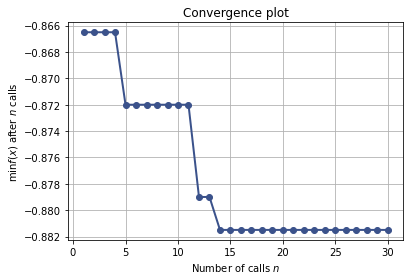

In [21]:
# plot convergence 

from skopt.plots import plot_convergence

plot_convergence(result) 